# A Simplified 3-body Problem
## Christina Lee
## Prerequisites: Classical Mechanics

![](2body.svg)

Suppose we have two massive bodies $M_1$ and $M_2$ rotating around each other in a perfectly circular orbit.  In this orbit, the gravitational force perfectly balances the centripital force.

$$
\frac{G M_1 M_2}{r^2} = M_1 r_1 \omega = M_2 r_2 \omega
$$

Working in the center of mass reference frame,

$$
M_1 r_1 = M_2 r_2= M_1 (r-r_2) 
$$
$$
(M_2+M_1) r_2 = M_1 r
$$
$$
r_2 = \frac{M_1}{M_2+M_1} r \qquad \qquad r_1 = \frac{M_2}{M_2+M_1} r
$$

Putting this back into our force equation

$$
\omega = \frac{G (M_1+M_2 )}{r^3} 
$$


$$
F_{Coriolis} = - 2m \vec{\Omega} \times \vec{v}
$$
$$
F_{centrifugal} = - m \vec{\Omega} \times ( \vec{\Omega} \times \vec{r} )
$$

In [3]:
using Plots
using LinearAlgebra
using DifferentialEquations
gr()

Plots.GRBackend()

In [2]:
M1=1.
M2=0.001
r=1

1

In [4]:
G=1

1

In [5]:
r1=M2*r/(M1+M2)
r2=M1*r/(M1+M2)

x1=[-r1,0,0]
x2=[r2,0,0]

μ=M1*M2/(M1+M2)

ω=sqrt(G*(M1+M2)/r^3)

1.000499875062461

In [30]:
function F_Coriolis(v::Array{Float64})
    return -2*ω*[-v[2],v[1],0]
end

function F_Centrifugal(x::Array{Float64})
    return ω^2*[x[1],x[2],0]
end

function F_G(x::Array{Float64})
   return -G*M1*(x-x1)/norm(x-x1)^3-G*M2*(x-x2)/norm(x-x2)^3
end

F_G (generic function with 1 method)

In [31]:
function D(x::Array{Float64},v::Array{Float64})
    dx=v
    dv=F_G(x)+F_Centrifugal(x)+F_Coriolis(v)
    return vcat(dx,dv)
end

function SolverForm(du,u,p,t)    
    du[1:3]=u[4:6]
    du[4:6]=F_G(u[1:3])+F_Centrifugal(u[1:3])+F_Coriolis(u[4:6])
end

SolverForm (generic function with 1 method)

In [48]:
u0=[cos(π/3)+.01;sin(π/3);0.;0.;0.0;0.]
tspan=(0.,100.)

(0.0, 100.0)

In [49]:
prob = ODEProblem(SolverForm,u0,tspan)
sol = solve(prob);

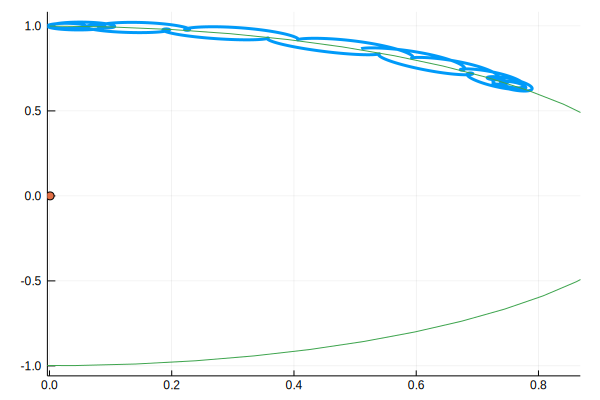

In [53]:
plot(sol,vars=(1,2))
scatter!([r1,r2],[0,0])
plot!(r2*sin.(collect(0:.1:2π)),r2*cos.(collect(0:.1:2π)),legend=false)